In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

### Data

In [2]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.duplicated().sum()

240

In [4]:
df = df.drop_duplicates()

### implementation 

In [5]:
def correlation(x, y):
    x1 = (x - np.mean(x))
    y1 = (y - np.mean(y))

    num = np.sum(x1*y1)
    div = np.sqrt(np.sum(x1**2) * np.sum(y1**2))
    return num/div

In [6]:
class MyLinearRegression():
    def __init__(self):
        self.b0 = 0.0
        self.b1 = 0.0

    def fit(self, x, y):
        self.b1 = correlation(x, y) * np.std(y) / np.std(x)
        self.b0 = np.mean(y) - (self.b1 * np.mean(x))

    def predict(self, x):
        return self.b0 + self.b1*x

In [7]:
class PolynomialRegression():
    def __init__(self, degree=2):
        self.degree = degree
        self.b = None

    def fit(self, x, y):
        powers = self.__compute_powers(x)

        b1 = np.linalg.inv(np.dot(powers.T, powers))
        b2 = np.dot(powers.T, y)
        self.b = np.dot(b1, b2)

    def predict(self, x):
        powers = self.__compute_powers(x)
        return np.dot(powers, self.b)

    def __compute_powers(self, x):
        x = x.ravel()
        powers = np.empty((x.shape[0], self.degree + 1))
        powers[:, 0] = np.ones(x.shape[0])
        powers[:, 1] = x

        for p in range(2, self.degree+1):
            powers[:, p] = x**p
        return powers

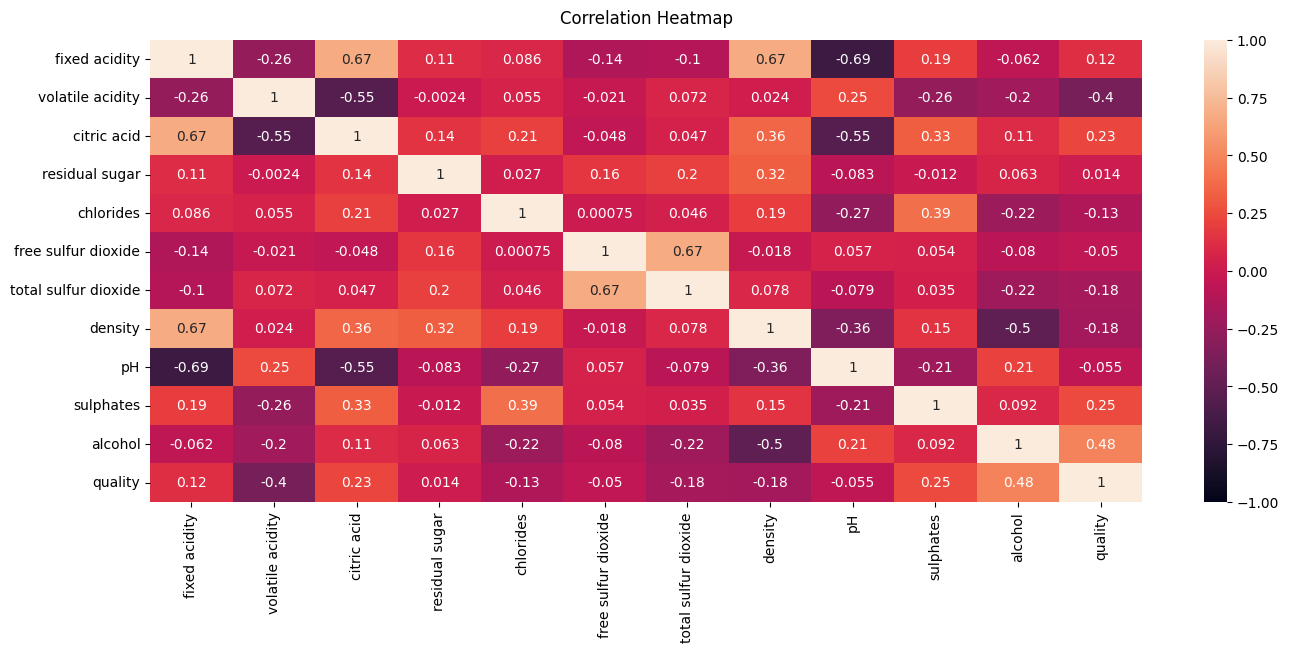

In [8]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Model Analysis

The notebook aims to provide insights into the performance differences between linear regression and polynomial regression when applied to a specific dataset. By employing both models, we seek to understand their respective strengths and limitations in capturing the underlying patterns in the data.

I only consider correlations with a minimum threshold of 0.5 or -0.5, ensuring that we focus on the most significant relationships in the data.

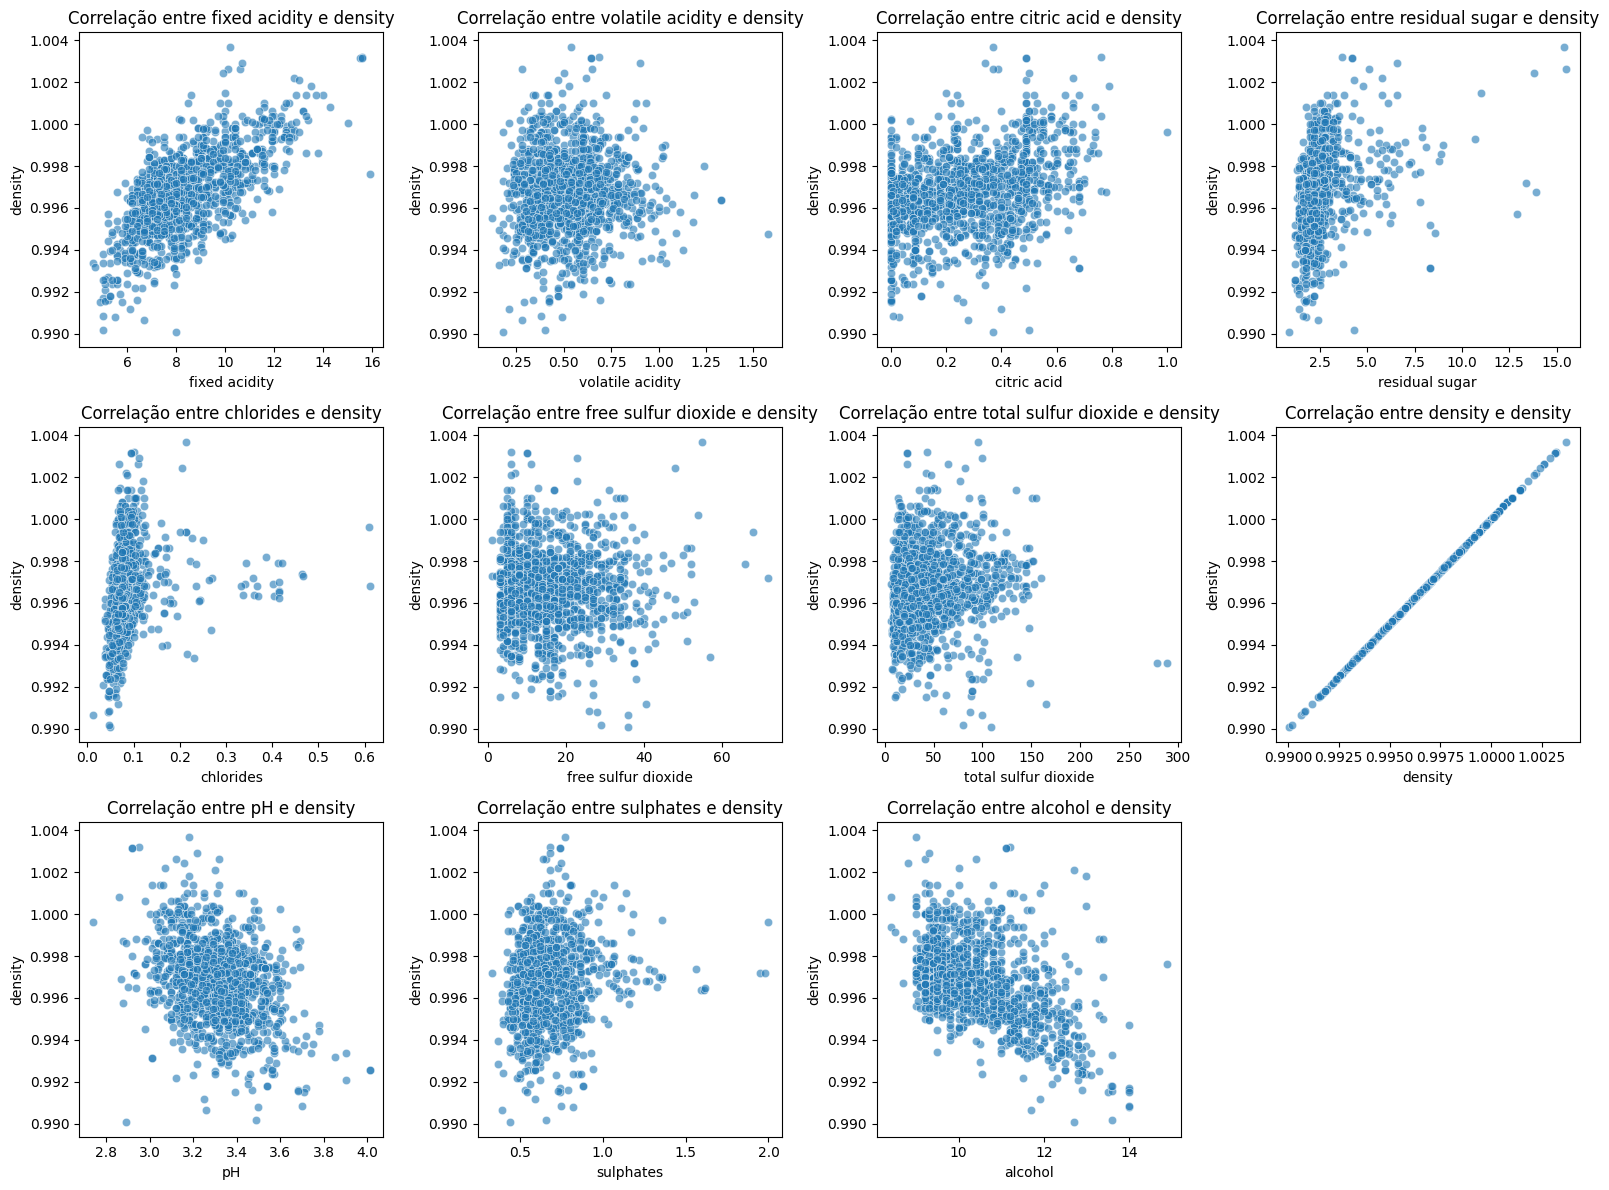

In [9]:
# loop to check the correlation between the features and the target variable.
# change y to the target variable you want to check the correlation with.

plt.figure(figsize=(16, 12))

for i, column in enumerate(df.columns[:-1]):  
    plt.subplot(3, 4, i + 1)  
    sns.scatterplot(x=column, y='density', data=df, alpha=0.6)
    plt.title(f'Correlação entre {column} e density')

plt.tight_layout()  
plt.show()

#### Linear Regression

Mean Squared Error (MSE): 0.01269293972435453


Text(0, 0.5, 'pH')

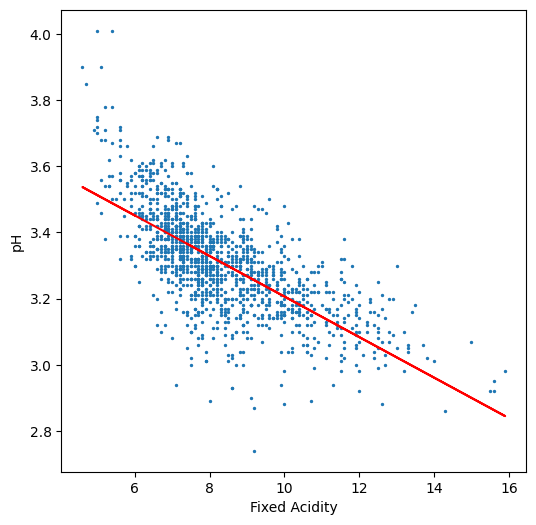

In [10]:
x = df['fixed acidity']
y = df['pH']


reg = MyLinearRegression()
reg.fit(x, y)

y_pred = reg.predict(x)

# Calculando o MSE
mse = mean_squared_error(y, y_pred)

print("Mean Squared Error (MSE):", mse)

plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=2)
plt.plot(x,y_pred, c='red')
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')


Mean Squared Error (MSE): 0.0167447669222557


Text(0, 0.5, 'pH')

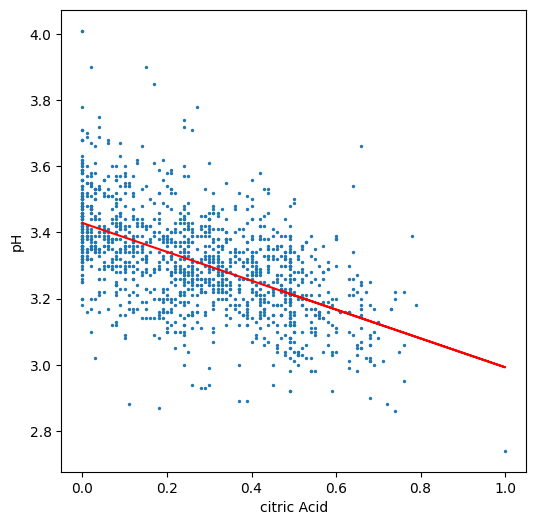

In [11]:
x = df['citric acid']
y = df['pH']


reg = MyLinearRegression()
reg.fit(x, y)

y_pred = reg.predict(x)

# Calculando o MSE
mse = mean_squared_error(y, y_pred)

print("Mean Squared Error (MSE):", mse)

plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=2)
plt.plot(x,y_pred, c='red')
plt.xlabel('citric Acid')
plt.ylabel('pH')


Mean Squared Error (MSE): 0.023303369884441184


Text(0, 0.5, 'Volatile Acidity')

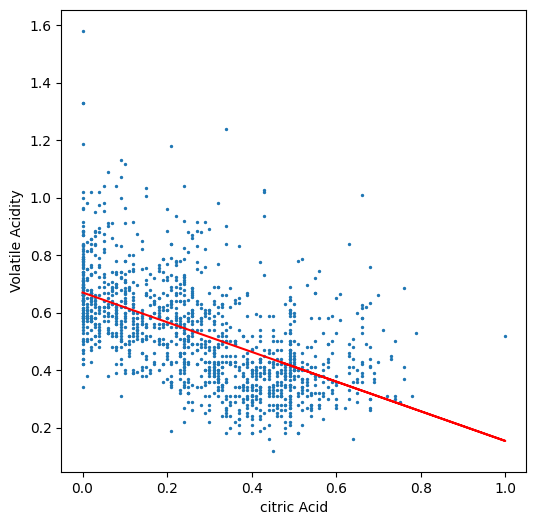

In [12]:
x = df['citric acid']
y = df['volatile acidity']


reg = MyLinearRegression()
reg.fit(x, y)

y_pred = reg.predict(x)

# Calculando o MSE
mse = mean_squared_error(y, y_pred)

print("Mean Squared Error (MSE):", mse)

plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=2)
plt.plot(x,y_pred, c='red')
plt.xlabel('citric Acid')
plt.ylabel('Volatile Acidity')


Mean Squared Error (MSE): 1.9225816851803083e-06


Text(0, 0.5, 'density')

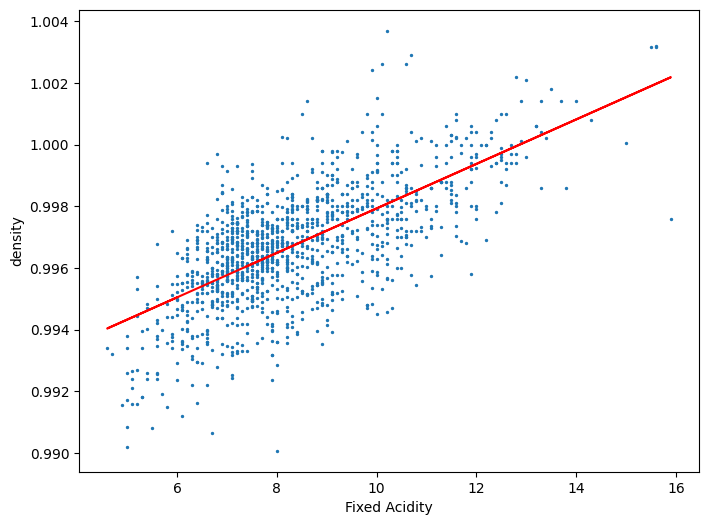

In [13]:
x = df['fixed acidity']
y = df['density']


reg = MyLinearRegression()
reg.fit(x, y)

y_pred = reg.predict(x)

# Calculando o MSE
mse = mean_squared_error(y, y_pred)

print("Mean Squared Error (MSE):", mse)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=2)
plt.plot(x, reg.predict(x), c='red')
plt.xlabel('Fixed Acidity')
plt.ylabel('density')


Mean Squared Error (MSE): 2.6001900214670135e-06


Text(0, 0.5, 'density')

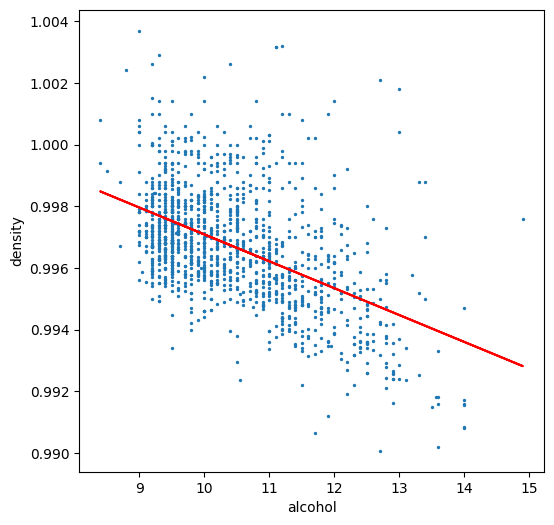

In [14]:
x = df['alcohol']
y = df['density']


reg = MyLinearRegression()
reg.fit(x, y)

y_pred = reg.predict(x)

# Calculando o MSE
mse = mean_squared_error(y, y_pred)

print("Mean Squared Error (MSE):", mse)

plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=2)
plt.plot(x,y_pred, c='red')
plt.xlabel('alcohol')
plt.ylabel('density')


Mean Squared Error (MSE): 0.021186496567527826


Text(0, 0.5, 'citric acid')

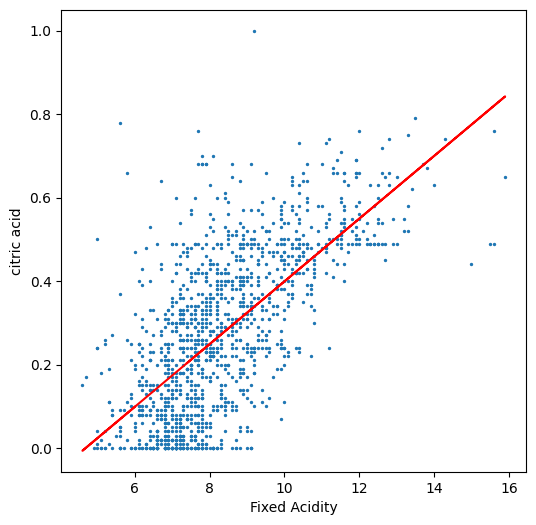

In [15]:
x = df['fixed acidity']
y = df['citric acid']

reg = MyLinearRegression()
reg.fit(x, y)

y_pred = reg.predict(x)

# Calculando o MSE
mse = mean_squared_error(y, y_pred)

print("Mean Squared Error (MSE):", mse)

plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=2)
plt.plot(x, reg.predict(x), c='red')
plt.xlabel('Fixed Acidity')
plt.ylabel('citric acid')


### polinomial

Mean Squared Error (MSE): 0.011811089024238679


C:\Users\Lucas Rocha\AppData\Local\Temp\ipykernel_7844\2145649199.py:18: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  x = x.ravel()
C:\Users\Lucas Rocha\AppData\Local\Temp\ipykernel_7844\2145649199.py:18: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  x = x.ravel()


Text(0, 0.5, 'pH')

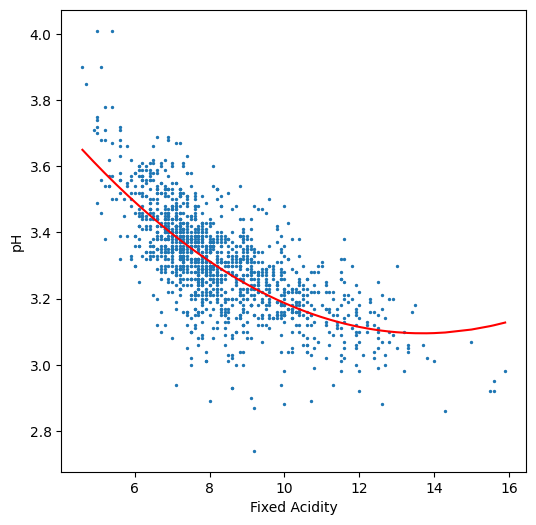

In [16]:
df_sorted = df.sort_values(by=['fixed acidity','pH'])

#the sorting of the data is necessary to plot the line correctly

x = df_sorted['fixed acidity']
y = df_sorted['pH']

reg = PolynomialRegression()
reg.fit(x, y)

y_pred = reg.predict(x)

# Calculando o MSE
mse = mean_squared_error(y, y_pred)

print("Mean Squared Error (MSE):", mse)

plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=2)
plt.plot(x, reg.predict(x), c='red')
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')


Mean Squared Error (MSE): 0.01673362434731851


C:\Users\Lucas Rocha\AppData\Local\Temp\ipykernel_7844\2145649199.py:18: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  x = x.ravel()


Text(0, 0.5, 'pH')

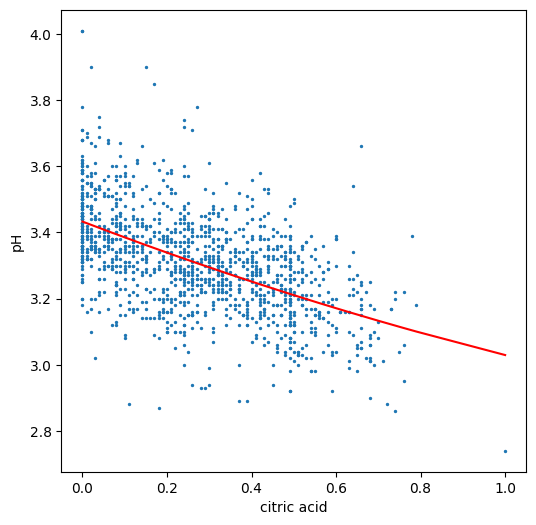

In [17]:
df_sorted = df.sort_values(by=['citric acid','pH'])

x = df_sorted['citric acid']
y = df_sorted['pH']


reg = PolynomialRegression()
reg.fit(x, y)

y_pred = reg.predict(x)

# Calculando o MSE
mse = mean_squared_error(y, y_pred)

print("Mean Squared Error (MSE):", mse)

plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=2)
plt.plot(x,y_pred, c='red')
plt.xlabel('citric acid')
plt.ylabel('pH')


Mean Squared Error (MSE): 0.02219582708757715


C:\Users\Lucas Rocha\AppData\Local\Temp\ipykernel_7844\2145649199.py:18: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  x = x.ravel()


Text(0, 0.5, 'Volatile Acidity')

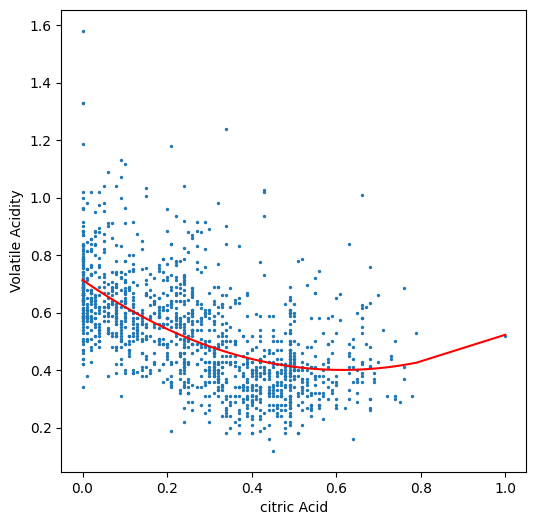

In [18]:
df_sorted = df.sort_values(by=['citric acid','volatile acidity'])

x = df_sorted['citric acid']
y = df_sorted['volatile acidity']


reg = PolynomialRegression()
reg.fit(x, y)

y_pred = reg.predict(x)

# Calculando o MSE
mse = mean_squared_error(y, y_pred)

print("Mean Squared Error (MSE):", mse)

plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=2)
plt.plot(x,y_pred, c='red')
plt.xlabel('citric Acid')
plt.ylabel('Volatile Acidity')


Mean Squared Error (MSE): 1.9000669582981325e-06


C:\Users\Lucas Rocha\AppData\Local\Temp\ipykernel_7844\2145649199.py:18: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  x = x.ravel()
C:\Users\Lucas Rocha\AppData\Local\Temp\ipykernel_7844\2145649199.py:18: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  x = x.ravel()


Text(0, 0.5, 'density')

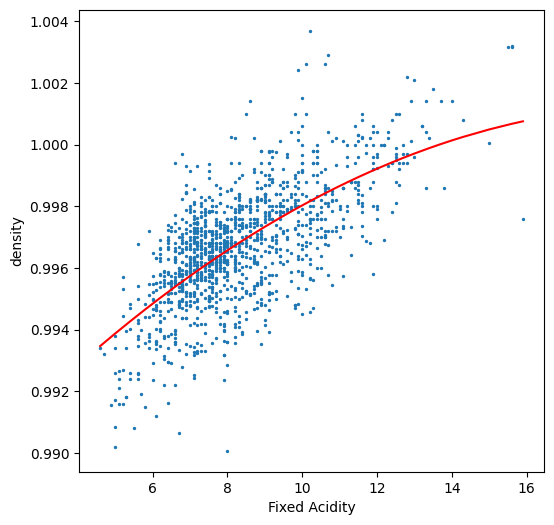

In [19]:
df_sorted = df.sort_values(by=['fixed acidity', 'density'])

x = df_sorted['fixed acidity']
y = df_sorted['density']


reg = PolynomialRegression()
reg.fit(x, y)

y_pred = reg.predict(x)

# Calculando o MSE
mse = mean_squared_error(y, y_pred)

print("Mean Squared Error (MSE):", mse)

plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=2)
plt.plot(x, reg.predict(x), c='red')
plt.xlabel('Fixed Acidity')
plt.ylabel('density')


Mean Squared Error (MSE): 2.5790028819014633e-06


C:\Users\Lucas Rocha\AppData\Local\Temp\ipykernel_7844\2145649199.py:18: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  x = x.ravel()
C:\Users\Lucas Rocha\AppData\Local\Temp\ipykernel_7844\2145649199.py:18: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  x = x.ravel()


Text(0, 0.5, 'density')

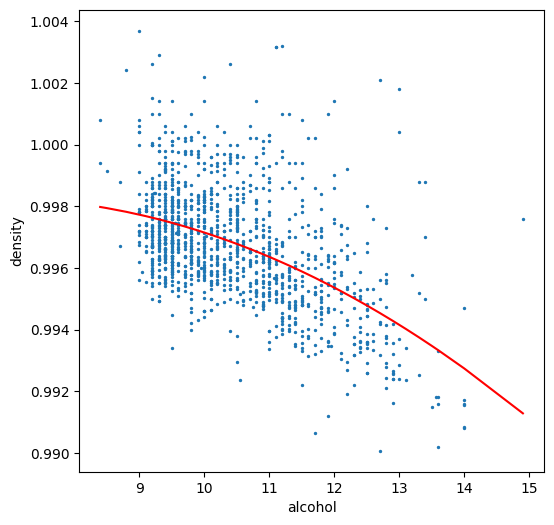

In [20]:
df_sorted = df.sort_values(by=['alcohol', 'density'])

x = df_sorted['alcohol']
y = df_sorted['density']

reg = PolynomialRegression()
reg.fit(x, y)

y_pred = reg.predict(x)

# Calculando o MSE
mse = mean_squared_error(y, y_pred)

print("Mean Squared Error (MSE):", mse)

plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=2)
plt.plot(x, reg.predict(x), c='red')
plt.xlabel('alcohol')
plt.ylabel('density')


Mean Squared Error (MSE): 0.021159667200646035


C:\Users\Lucas Rocha\AppData\Local\Temp\ipykernel_7844\2145649199.py:18: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  x = x.ravel()
C:\Users\Lucas Rocha\AppData\Local\Temp\ipykernel_7844\2145649199.py:18: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  x = x.ravel()


Text(0, 0.5, 'citric acid')

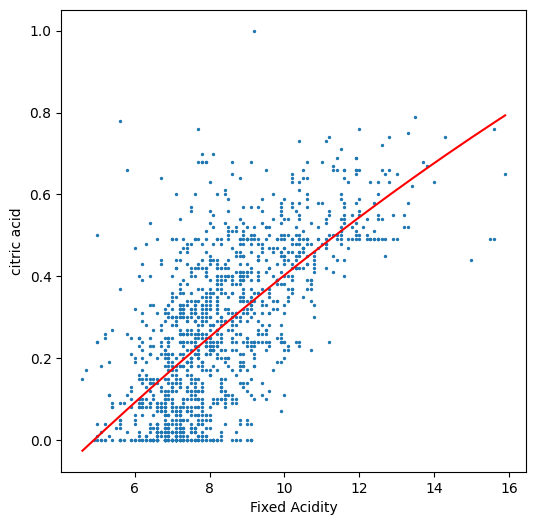

In [21]:
df_sorted = df.sort_values(by=['fixed acidity', 'citric acid'])

x = df_sorted['fixed acidity']
y = df_sorted['citric acid']

reg = PolynomialRegression()
reg.fit(x, y)

y_pred = reg.predict(x)

# Calculando o MSE
mse = mean_squared_error(y, y_pred)

print("Mean Squared Error (MSE):", mse)

plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=2)
plt.plot(x, reg.predict(x), c='red')
plt.xlabel('Fixed Acidity')
plt.ylabel('citric acid')
